# "Car Accident Severity". 

## In this project I will  predict the severity of car accidents by Applying Classification Algorithms.

---

#   **1. Introduction and Understanding of this problem**


                               Road accidents in India claimed over 1.5 lakh lives in 2018.

    The ministry of road transport and highways issued a report on Road accidents in India in 2018, which showed that road accidents last year increased by 0.46% as compared to 2017.A total of 4,67,044 road accidents have been reported by States and Union Territories (UTs) in the calendar year 2018, claiming 1,51,417 lives and causing injuries to 4,69,418 persons.Over-speeding accounted for 64.4% of the persons killed.India, ranks 1st in the number of road accident deaths across the 199 countries reported in the World Road Statistics, 2018 followed by China and US. As per the WHO Global Report on Road Safety 2018, India accounts for almost 11% of the accident related deaths in the World.

    National Highways which comprise of 1.94 percent of total road network, accounted for 30.2 per cent of total road accidents and 35.7 per cent of deaths in 2018. State Highways which account for 2.97% of the road length accounted for 25.2 percent and 26.8 percent of accidents and deaths respectively.

    As India having a major problem of water-logging during monsoon, this analysis can help BMC and the Road Department can predict the weather and take precautions in advance so that accidents especially during rainfalls can be reduced to quite a bit.

    I would like to know if we can reduce this severity and avoid future accidents by analyzing and applying various Classification Machine Learning Algorithms on the data provided by IBM.This study will hopefully reveal what, if any, measures we can take as individuals and municipalities to make travel in India safer especially under harsh weather conditions.

# 2. Data Explaination

## Importing Essential Libraries And our Car Dataset

In [55]:
# Importing Only Essential Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.utils import resample

In [56]:
# Importing Data
dataset = pd.read_csv('Data_Collisions_3.csv', low_memory = False)
dataset.head(10)

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   
5             1 -122.387598  47.690575         6  320840     322340  E919477   
6             1 -122.338485  47.618534         7   83300      83300  3282542   
7             2 -122.320780  47.614076         9  330897     332397  EA30304   
8             1 -122.335930  47.611904        10   63400      63400  2071243   
9             2 -122.384700  47.528475        12   58600      58600  2072105   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   
5  Matched  Intersection  36974.0  ...      Dry                 Daylight   
6  Matched  Intersection  29510.0  ...      Wet                 Daylight   
7  Matched  Intersection  29745.0  ...      Dry                 Daylight   
8  Matched         Block      NaN  ...      Dry                 Daylight   
9  Matched  Intersection  34679.0  ...      Dry                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   
5           NaN         NaN      NaN         10   
6           NaN   8344002.0      NaN         10   
7           NaN         NaN      NaN          5   
8           NaN   6166014.0      NaN         32   
9           NaN   6079001.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   
5                                  Entering at angle           0   
6                                  Entering at angle           0   
7                       Vehicle Strikes Pedalcyclist        6855   
8                             One parked--one moving           0   
9                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  
5             0             N  
6             0             N  
7             0             N  
8             0             N  
9             0             N  

[10 rows x 38 columns]

------------------------------------------------------------------------

# Data Preprocessing

In [57]:
print('Number of Rows:',dataset.shape[0])
print('Number of Columns:',dataset.shape[1])

Number of Rows: 194673
Number of Columns: 38


In [58]:
dataset.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [59]:
Collisions = dataset[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
Collisions.head()

SEVERITYCODE      ADDRTYPE   WEATHER ROADCOND                LIGHTCOND  \
0             2  Intersection  Overcast      Wet                 Daylight   
1             1         Block   Raining      Wet  Dark - Street Lights On   
2             1         Block  Overcast      Dry                 Daylight   
3             1         Block     Clear      Dry                 Daylight   
4             2  Intersection   Raining      Wet                 Daylight   

                  INCDTTM  
0    3/27/2013 2:54:00 PM  
1   12/20/2006 6:55:00 PM  
2  11/18/2004 10:20:00 AM  
3    3/29/2013 9:26:00 AM  
4    1/28/2004 8:04:00 AM

In [60]:
# Explore attribute data

Collisions.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [61]:
Collisions.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [62]:
Collisions.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [63]:
Collisions.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [64]:
# Convert to date/time, calc day of week

Collisions['INCDTTM'] = pd.to_datetime(Collisions['INCDTTM'])
Collisions['DAYOFWEEK'] = Collisions['INCDTTM'].dt.dayofweek
Collisions.head()

<ipython-input-64-61479b800ae4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-61479b800ae4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SEVERITYCODE      ADDRTYPE   WEATHER ROADCOND                LIGHTCOND  \
0             2  Intersection  Overcast      Wet                 Daylight   
1             1         Block   Raining      Wet  Dark - Street Lights On   
2             1         Block  Overcast      Dry                 Daylight   
3             1         Block     Clear      Dry                 Daylight   
4             2  Intersection   Raining      Wet                 Daylight   

              INCDTTM  DAYOFWEEK  
0 2013-03-27 14:54:00          2  
1 2006-12-20 18:55:00          2  
2 2004-11-18 10:20:00          3  
3 2013-03-29 09:26:00          4  
4 2004-01-28 08:04:00          2

In [65]:
Collisions.groupby(['DAYOFWEEK'])['SEVERITYCODE'].value_counts(normalize=True)

DAYOFWEEK  SEVERITYCODE
0          1               0.697281
           2               0.302719
1          1               0.694250
           2               0.305750
2          1               0.695705
           2               0.304295
3          1               0.692470
           2               0.307530
4          1               0.704358
           2               0.295642
5          1               0.706196
           2               0.293804
6          1               0.722022
           2               0.277978
Name: SEVERITYCODE, dtype: float64

----------------------------------------------------------------------------------

# Data Visualization

## Now that our data is cleaned properly, lets visualize it.

In [66]:
a = dataset['SEVERITYCODE'].value_counts()
xx = a.index
yy = a.values
fig = px.bar(dataset['SEVERITYCODE'], x=xx, y=yy, color = xx)
fig.show()

In [67]:
fig = px.histogram(dataset['ADDRTYPE'])
fig.show()

In [68]:
a = dataset['SEVERITYDESC'].value_counts()
xx = a.index
yy = a.values
fig = px.bar(dataset['SEVERITYDESC'], x=xx, y=yy, color = xx)
fig.show()

In [69]:
a = dataset['COLLISIONTYPE'].value_counts()
df = dataset['COLLISIONTYPE']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [70]:
a = dataset['PERSONCOUNT'].value_counts()
df = dataset['PERSONCOUNT']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [71]:
a = dataset['WEATHER'].value_counts()
df = dataset['WEATHER']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [72]:
a = dataset['ROADCOND'].value_counts()
df = dataset['ROADCOND']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [73]:
a = dataset['LIGHTCOND'].value_counts()
df = dataset['LIGHTCOND']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

In [74]:
a = dataset['ST_COLDESC'].value_counts()
df = dataset['ST_COLDESC']
xx = a.index
yy = a.values
fig = px.bar(df, x=xx, y=yy, color = xx)
fig.show()

### Following are the observations we have concluded after visualizing our data:
    1. Number of accidents with Severity 1 is greater that that of Severity 2. Severity 1 has total a of 124.258k fatalities while that of Severity 2 is of 55.809k.
    2. More accidents occur at Blocks compared to Intersections. Number of accidents at occured at Block are 117.085k while that of Intersections are 62.982k.
    3. As seen in point No.1, it is good to see that most collisions caused only property damage like roads, vehicles etc. rather than causing Injuries. The numbers are also the same - Property Damage = 124.258k & Injury Collisions = 55.809k
    4. Top 3 accidents have occurred when:
            1 - Cars were parked and not moving. Total of 42.886k Fatalities.
            2 - At road angles.Probably occurred when one or more person(s) failed to notice another vehicle coming out from the                 other side of the road. Total of 34.353k Fatalities.
            3 - At Rear Ends. This one occurs mostly when a person tries to overtake another vehicle in front of them.
                Total of 32.778k Fatalities.
    5. Maximum 2 to 3 Persons were involved in a particular accident. No of accidents with 2 persons - 104.408k.  No of                accidents with 3 persons - 34.356k.

Most surprising thing to see is that most accidents have occured when one of the two cars involved in an accident was parked and still. Also most accidents have occured in broad Daylight when the weather conditions were good. This is probably because of the roads. The roads are not well maintained and must be crooky or bumped here and there. From my observation, it is the Roads that need maintenance although we will come to our conclusion only after applying our Machine Learning Models on this data.  

----

# Now the favourite part. MACHINE LEARNING !!

Since we are going to predict Car Accident Severity which is a Categorical Variable, either 1 or 2 , we will use a Classification Algorithm.

There are many classification Algorithms but for this case we will use Random Forest, Logistic Regression & XGBoost model.

Below is a short explaination of XGBoost algorithm.

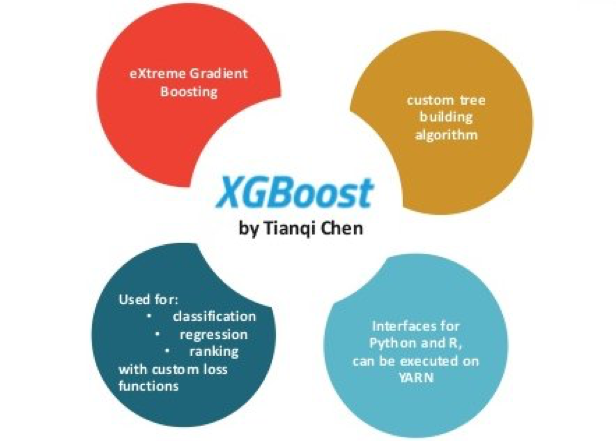

# Encoding Categorical Data

## Encoding the Independent Variable

In [75]:
# One hot encode all of the categorical data and append

CollisionFeature = Collisions[['DAYOFWEEK']]
CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(dataset['ADDRTYPE']),pd.get_dummies(dataset['WEATHER']),pd.get_dummies(dataset['ROADCOND']),pd.get_dummies(dataset['LIGHTCOND'])], axis=1)
# CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(df['WEATHER'])], axis=1)
CollisionFeature.head()

DAYOFWEEK  Alley  Block  Intersection  Blowing Sand/Dirt  Clear  \
0          2      0      0             1                  0      0   
1          2      0      1             0                  0      0   
2          3      0      1             0                  0      0   
3          4      0      1             0                  0      1   
4          2      0      0             1                  0      0   

   Fog/Smog/Smoke  Other  Overcast  Partly Cloudy  ...  Wet  \
0               0      0         1              0  ...    1   
1               0      0         0              0  ...    1   
2               0      0         1              0  ...    0   
3               0      0         0              0  ...    0   
4               0      0         0              0  ...    1   

   Dark - No Street Lights  Dark - Street Lights Off  Dark - Street Lights On  \
0                        0                         0                        0   
1                        0                         0                        1   
2                        0                         0                        0   
3                        0                         0                        0   
4                        0                         0                        0   

   Dark - Unknown Lighting  Dawn  Daylight  Dusk  Other  Unknown  
0                        0     0         1     0      0        0  
1                        0     0         0     0      0        0  
2                        0     0         1     0      0        0  
3                        0     0         1     0      0        0  
4                        0     0         1     0      0        0  

[5 rows x 33 columns]

# Feature Scaling

In [76]:
# Set our feature selection and labels as X and y

X = CollisionFeature
y = Collisions['SEVERITYCODE'].values

In [77]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.48852801, -0.06223095, -1.36876932,  1.41129279, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024, -0.03476509, -0.27267986],
       [-0.48852801, -0.06223095,  0.73058329, -0.70857019, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239,  1.73588509, -0.00751719, -0.1141037 , -1.21604855,
        -0.17682024, -0.03476509, -0.27267986],
       [ 0.03188685, -0.0622

# Splitting the dataset into Training Set & Test Set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
classifier_random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [80]:
y_pred_random = classifier_random.predict(X_test)
print(np.concatenate((y_pred_random.reshape(len(y_pred_random),1), y_test.reshape(len(y_test),1)),1))

[[1 2]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 2]
 [1 1]]


## Applying Confusion Matrix & Accuracy Score For Random Forest

In [81]:
cm_random = confusion_matrix(y_test, y_pred_random)
print(cm_random)
accuracy_score(y_test, y_pred_random)

[[26866   243]
 [11654   172]]


0.6944394503659946

## Applying k-Fold Cross Validation For Random Forest

In [82]:
accuracies_random = cross_val_score(estimator = classifier_random, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_random.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_random.std()*100))

Accuracy: 69.93 %
Standard Deviation: 0.09 %


In [83]:
RF_class_report = classification_report(y_test, y_pred_random)
RF_f_score = f1_score(y_test, y_pred_random, average='weighted')
print('RF F1 score:', round(RF_f_score, 4))
print('RF classification report:\n\n', RF_class_report)

RF F1 score: 0.5786
RF classification report:

               precision    recall  f1-score   support

           1       0.70      0.99      0.82     27109
           2       0.41      0.01      0.03     11826

    accuracy                           0.69     38935
   macro avg       0.56      0.50      0.42     38935
weighted avg       0.61      0.69      0.58     38935



# Logistic Regression

In [84]:
classifier_log = LogisticRegression(random_state = 1)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=1)

## Applying Confusion Matrix & Accuracy Score For Logistic Regression

In [85]:
y_pred_log = classifier_log.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
accuracy_score(y_test, y_pred_log)

[[27106     3]
 [11825     1]]


0.6962116347759085

## Applying k-Fold Cross Validation For Logistic Regression

In [86]:
accuracies_log = cross_val_score(estimator = classifier_log, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_log.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_log.std()*100))

Accuracy: 70.23 %
Standard Deviation: 0.01 %


# Training XGBoost on the Training set

In [87]:
classifier_xg = XGBClassifier(random_state = 2)
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Applying Confusion Matrix & Accuracy Score For XGBoost

In [88]:
y_pred_xg = classifier_xg.predict(X_test)
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)
accuracy_score(y_test, y_pred_xg)

[[26971   138]
 [11713   113]]


0.6956209066392706

## Applying k-Fold Cross Validation For XGBoost

In [89]:
accuracies_xg = cross_val_score(estimator = classifier_xg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_xg.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_xg.std()*100))

Accuracy: 70.13 %
Standard Deviation: 0.07 %


# Everything is finshed. Following things are to be done today:
                        1. Describe your findings above this cell.
                        2. Save visualizations for report and presentation.
                        3. Prepare a Report.
                        4. Make a nice looking Presentation.